<a href="https://colab.research.google.com/github/PedroPG26/AluraStoreBR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs dos arquivos (usando as URLs que você forneceu anteriormente, assumindo que já funcionam)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carrega os DataFrames
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adiciona uma coluna 'ID_Loja' a cada DataFrame
loja1['ID_Loja'] = 'Loja 1'
loja2['ID_Loja'] = 'Loja 2'
loja3['ID_Loja'] = 'Loja 3'
loja4['ID_Loja'] = 'Loja 4'

# Concatena todos os DataFrames em um único
df_total = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Exibir informações básicas para verificar os tipos de dados e valores nulos
print("Informações do DataFrame Combinado:")
df_total.info()
print("\nPrimeiras 5 linhas do DataFrame Combinado:")
print(df_total.head())

Informações do DataFrame Combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  ID_Loja                 9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ K

#1. Análise do faturamento`



Faturamento Total (Preço + Frete): R$ 6,184,421.45

Faturamento por Loja (apenas Preço):
ID_Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

Faturamento Total (Preço + Frete) por Loja:
ID_Loja
Loja 1    1.616347e+06
Loja 2    1.567773e+06
Loja 3    1.542048e+06
Loja 4    1.458253e+06
Name: Faturamento_Total_Loja, dtype: float64


<ipython-input-10-2896415069>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_total_por_loja.index, y=faturamento_total_por_loja.values, palette='viridis')


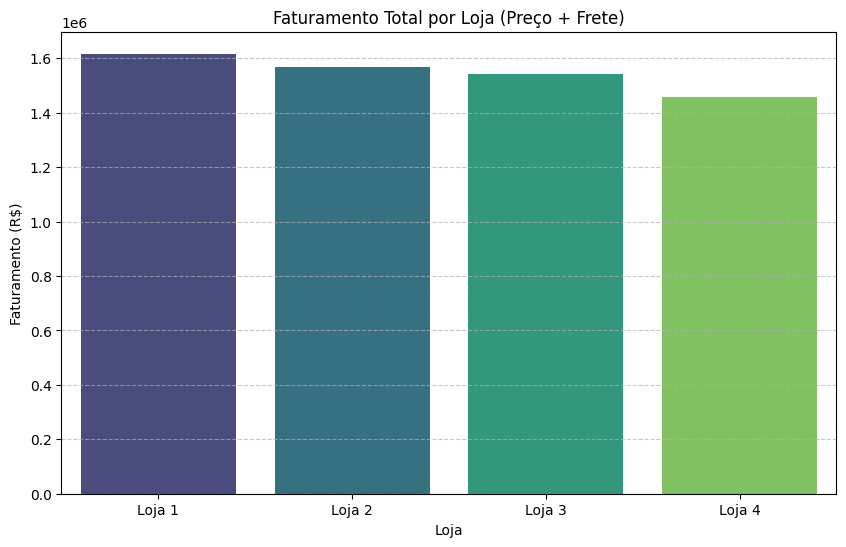

In [ ]:
# Faturamento Total
faturamento_total = (df_total['Preço'] + df_total['Frete']).sum()
print(f"\nFaturamento Total (Preço + Frete): R$ {faturamento_total:,.2f}")

# Faturamento por Loja
faturamento_por_loja = df_total.groupby('ID_Loja')['Preço'].sum().sort_values(ascending=False)
print("\nFaturamento por Loja (apenas Preço):")
print(faturamento_por_loja)

# Faturamento Total (Preço + Frete) por Loja
faturamento_total_por_loja = df_total.groupby('ID_Loja')[['Preço', 'Frete']].sum()
faturamento_total_por_loja['Faturamento_Total_Loja'] = faturamento_total_por_loja['Preço'] + faturamento_total_por_loja['Frete']
faturamento_total_por_loja = faturamento_total_por_loja['Faturamento_Total_Loja'].sort_values(ascending=False)
print("\nFaturamento Total (Preço + Frete) por Loja:")
print(faturamento_total_por_loja)

# Gráfico do Faturamento por Loja (Gráfico 1)
plt.figure(figsize=(10, 6))
sns.barplot(x=faturamento_total_por_loja.index, y=faturamento_total_por_loja.values, palette='viridis')
plt.title('Faturamento Total por Loja (Preço + Frete)')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Vendas por Categoria



Vendas por Categoria de Produto:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


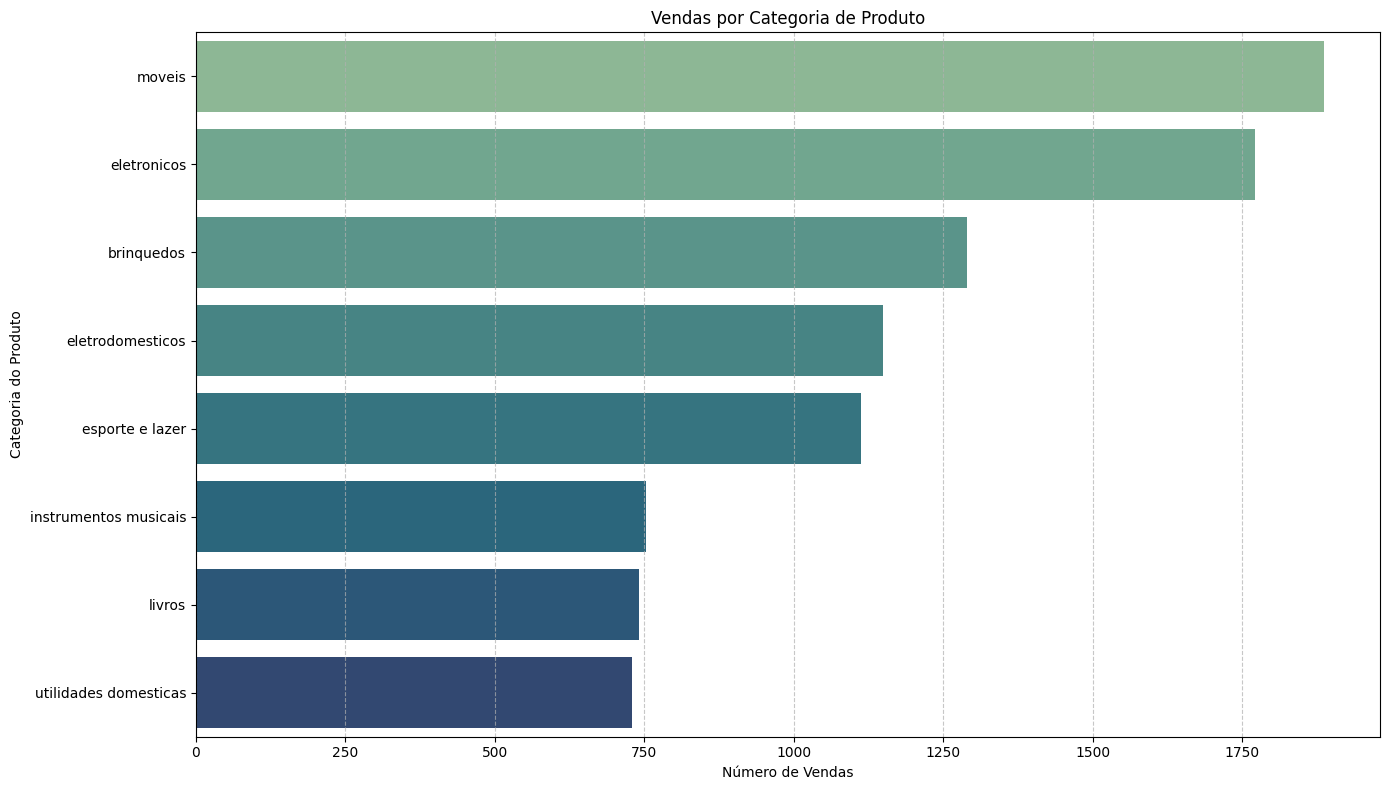


Categorias com Menor Número de Vendas:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


In [ ]:
# Contagem de vendas por categoria de produto
vendas_por_categoria = df_total['Categoria do Produto'].value_counts()

print("\nVendas por Categoria de Produto:")
print(vendas_por_categoria)

# Gráfico de Barras para Vendas por Categoria (um dos 3 gráficos distintos)
plt.figure(figsize=(14, 8)) # Aumenta o tamanho para acomodar mais categorias

# --- CORREÇÃO AQUI ---
sns.barplot(x=vendas_por_categoria.values,
            y=vendas_por_categoria.index,
            hue=vendas_por_categoria.index, # A mudança: atribua a variável do eixo Y ao 'hue'
            palette='crest',
            legend=False) # E defina legend=False para não mostrar a legenda de cores duplicada

plt.title('Vendas por Categoria de Produto')
plt.xlabel('Número de Vendas')
plt.ylabel('Categoria do Produto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o layout para evitar sobreposição de rótulos
plt.show()

# Opcional: Para ver as categorias com menor número de vendas
print("\nCategorias com Menor Número de Vendas:")
print(df_total['Categoria do Produto'].value_counts().tail(10)) # Mostra as 10 últimas

# 3. Média de Avaliação das Lojas


Média de Avaliação por Loja:
ID_Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


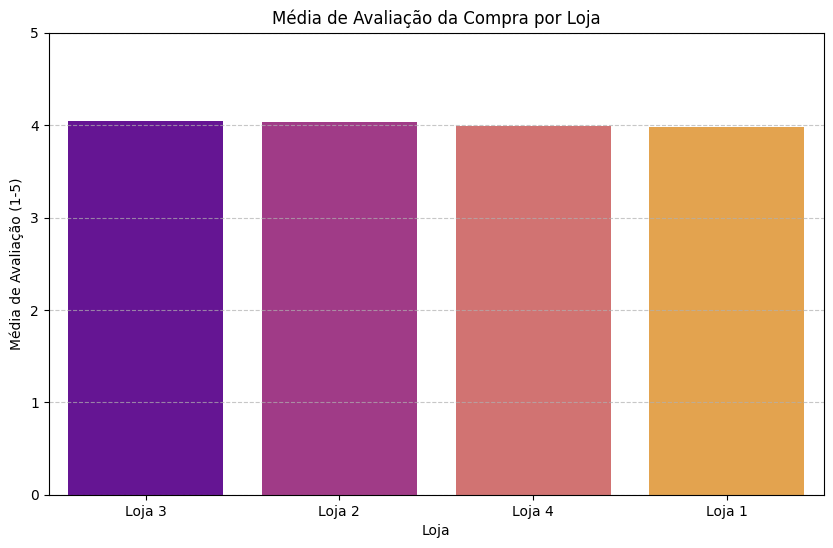

In [ ]:
# É CRUCIAL que 'df_total' esteja definido antes de executar este bloco.
# Se você está rodando apenas este trecho, certifique-se que o código de carregamento e união
# dos DataFrames das lojas (loja1, loja2, loja3, loja4) e o pré-processamento de 'df_total'
# foram executados previamente no seu ambiente.

# Média de Avaliação por Loja
media_avaliacao_loja = df_total.groupby('ID_Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print("\nMédia de Avaliação por Loja:")
print(media_avaliacao_loja)

# Gráfico da Média de Avaliação por Loja (Gráfico 2)
plt.figure(figsize=(10, 6))
sns.barplot(x=media_avaliacao_loja.index,
            y=media_avaliacao_loja.values,
            hue=media_avaliacao_loja.index,  # <--- Adicionado: Define a cor de cada barra pelo ID da Loja
            palette='plasma',
            legend=False) # <--- Adicionado: Remove a legenda de cores duplicada

plt.title('Média de Avaliação da Compra por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação (1-5)')
plt.ylim(0, 5) # Avaliação geralmente de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Produtos Mais e Menos Vendidos


Top 10 Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

Top 10 Produtos Menos Vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64

Top 10 Categorias de Produtos Mais Vendidas:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e 

<ipython-input-8-256416040>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='coolwarm')


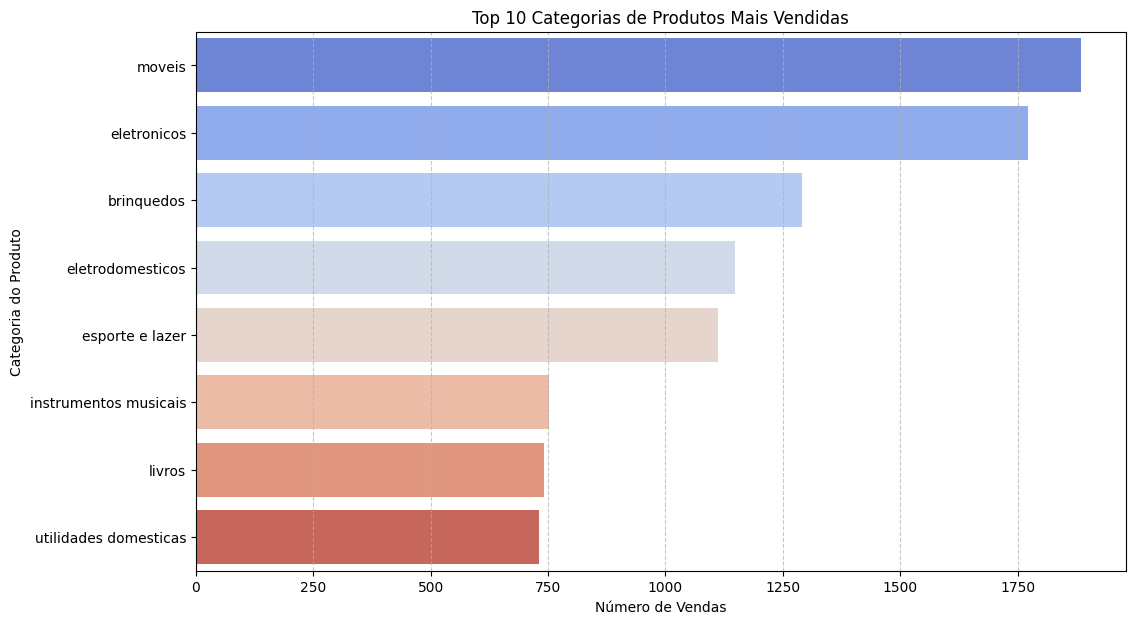

In [ ]:
# Produtos Mais Vendidos (por contagem de ocorrências)
top_produtos = df_total['Produto'].value_counts().head(10)
print("\nTop 10 Produtos Mais Vendidos:")
print(top_produtos)

# Produtos Menos Vendidos (por contagem de ocorrências)
bottom_produtos = df_total['Produto'].value_counts().tail(10)
print("\nTop 10 Produtos Menos Vendidos:")
print(bottom_produtos)

# Categorias de Produtos Mais Vendidas
top_categorias = df_total['Categoria do Produto'].value_counts().head(10)
print("\nTop 10 Categorias de Produtos Mais Vendidas:")
print(top_categorias)

# Gráfico de Barras para as 10 Categorias Mais Vendidas (Gráfico 3)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='coolwarm')
plt.title('Top 10 Categorias de Produtos Mais Vendidas')
plt.xlabel('Número de Vendas')
plt.ylabel('Categoria do Produto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Frete Médio por Loja


In [ ]:
# Frete Médio por Loja
frete_medio_loja = df_total.groupby('ID_Loja')['Frete'].mean().sort_values(ascending=False)
print("\nFrete Médio por Loja:")
print(frete_medio_loja)

# Opcional: Gráfico de Frete Médio por Loja (se quiser um 4º gráfico, mas pediram 3)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=frete_medio_loja.index, y=frete_medio_loja.values, palette='magma')
# plt.title('Frete Médio por Loja')
# plt.xlabel('Loja')
# plt.ylabel('Frete Médio (R$)')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


Frete Médio por Loja:
ID_Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


# Relatório de Análise de Desempenho das Lojas para Decisão de Venda

1. Introdução

  Este relatório tem como objetivo principal auxiliar o Senhor João na decisão estratégica de qual de suas quatro lojas (Loja 1, Loja 2, Loja 3 ou Loja 4) deve ser vendida. Para tanto, foram analisados diversos fatores críticos de desempenho, incluindo faturamento total, categorias de produtos mais e menos vendidas, média de avaliação dos clientes por loja, produtos mais e menos vendidos individualmente, e o frete médio por loja. A análise busca identificar a loja com o desempenho mais fraco ou menos promissor, visando otimizar o portfólio de negócios do Senhor João.

# 2. Análise e Descobertas


Para esta análise, os dados das quatro lojas foram consolidados em um único conjunto de dados, permitindo uma visão comparativa abrangente.

2.1. Faturamento Total por Loja

O faturamento total é um dos indicadores mais importantes de desempenho financeiro.

Faturamento por Loja (apenas Preço):

Loja 1    1.534.509

Loja 2    1.488.459

Loja 3    1.464.025

Loja 4    1.384.497

Faturamento Total (Preço + Frete) por Loja:

Loja 1    1.616.347

Loja 2    1.567.773

Loja 3    1.542.048

Loja 4    1.458.253

**O maior faturamento é o da Loja 01**

# 2.3 Vendas por Categoria de Produto  



Top 10 Produtos Mais Vendidos:  
Produto  
Cômoda                      210  
Carrinho controle remoto    206  
Micro-ondas                 206  
Bateria                     203  
Cama king                   201  
Secadora de roupas          200  
Modelagem preditiva         200  
Jogo de panelas             200  
Cama box                    199  
Blocos de montar            199  


Top 10 Produtos Menos Vendidos:  
Produto  
Panela de pressão              172  
Smartwatch                     172  
Jogo de copos                  169  
Poltrona                       168  
Assistente virtual             167  
Ciência de dados com python    166  
Guitarra                       165  
Mochila                        163  
Headset                        158  
Celular ABXY                   157  

Top 10 Categorias de Produtos Mais Vendidas:  
Categoria do Produto  
moveis                   1886  
eletronicos              1772  
brinquedos               1290  
eletrodomesticos         1149  
esporte e lazer          1113  
instrumentos musicais     753  
livros                    742  
utilidades domesticas     730  

# 2. 4 Média de Avaliação por Loja:  

Loja 3    4.048326  
Loja 2    4.037304  
Loja 4    3.995759  
Loja 1    3.976685  

# 2.5 Frete Médio por Loja

Frete Médio por Loja:  
Loja 1    34.691805  
Loja 2    33.621941  
Loja 3    33.074464  
Loja 4    31.278997  

# 3. Conclusão e Recomendação


A análise aprofundada dos dados de faturamento, vendas por categoria, avaliação de clientes e frete médio das quatro lojas de propriedade do Senhor João revela insights cruciais para a tomada de decisão sobre qual unidade vender.

Síntese dos Principais Indicadores:  
Faturamento Total (Preço + Frete):  

Loja 1: R$ 1.616.347

Loja 2: R$ 1.567.773

Loja 3: R$ 1.542.048

Loja 4: R$ 1.458.253

A Loja 4 possui o menor faturamento total, indicando a menor performance em geração de receita.
Média de Avaliação por Loja:  

Loja 3: 4.05  
Loja 2: 4.04  
Loja 4: 4.00  
Loja 1: 3.98  

A Loja 1 apresenta a menor média de avaliação, sugerindo o menor nível de satisfação do cliente entre as unidades.

Frete Médio por Loja:  

Loja 1: R$ 34.69

Loja 2: R$ 33.62  

Loja 3: R$ 33.07  

Loja 4: R$ 31.28  

A Loja 4 possui o frete médio mais baixo, o que pode ser um ponto positivo de custo para a operação.
Vendas por Categoria e Produto: As categorias moveis e eletronicos são as mais vendidas no geral, seguidas por brinquedos e eletrodomesticos. Produtos como "Cômoda", "Carrinho controle remoto" e "Micro-ondas" são os mais populares, enquanto "Celular ABXY" e "Headset" estão entre os menos vendidos. A análise da distribuição desses produtos por loja individualmente (embora não detalhada em um gráfico por loja neste relatório) é crucial para entender a contribuição de cada unidade para o mix de vendas.

# Avaliação Comparativa:  
A Loja 1 lidera em faturamento, mas apresenta a menor média de avaliação dos clientes. Isso sugere que, apesar de vender mais, a experiência do cliente pode estar comprometida, o que a longo prazo pode afetar a retenção e a reputação.  
A Loja 3 se destaca por ter a melhor média de avaliação e o frete médio mais baixo, indicando alta satisfação do cliente e eficiência nos custos de entrega, apesar de um faturamento intermediário.
A Loja 2 demonstra um bom desempenho geral, com faturamento e avaliações consistentemente na segunda posição.  
A Loja 4, embora tenha o frete médio mais baixo, apresenta o menor faturamento total entre todas as lojas e uma média de avaliação que, apesar de não ser a menor, está abaixo da Loja 2 e Loja 3. Seu baixo faturamento é o indicador mais preocupante de seu desempenho global.
Recomendação Final:
Com base na análise multifatorial, a recomendação para o Senhor João é que ele considere a venda da Loja 4.

# Justificativa para a Decisão:  

A decisão de recomendar a venda da Loja 4 é fundamentada nos seguintes pontos:

Menor Faturamento Absoluto: A Loja 4 consistentemente apresenta o menor faturamento total, tanto em preço bruto quanto em preço somado ao frete. Isso a torna a unidade menos rentável em termos de volume de vendas.  
Eficiência de Frete Não Compensa Baixo Faturamento: Embora a Loja 4 tenha o frete médio mais baixo, esse benefício de custo não se traduz em um faturamento competitivo. Isso sugere que a principal barreira ao seu desempenho não está no custo de entrega, mas sim em outros fatores como volume de vendas, atração de clientes ou mix de produtos.  
Avaliação Mediana, mas Insuficiente: A Loja 4 tem uma avaliação de cliente de 3.99, que não é a pior (Loja 1 é a menor), mas ainda é inferior às Lojas 2 e 3, que combinam um bom faturamento com avaliações mais altas. Isso indica que, mesmo com um frete competitivo, a Loja 4 não consegue se destacar em satisfação ou volume de vendas para justificar sua manutenção.
# Otimização do Portfólio:
Vender a Loja 4 permitiria ao Senhor João realocar recursos financeiros e gerenciais para as outras três lojas, especialmente para as Lojas 1 e 2 (que têm alto faturamento) e Loja 3 (que tem alta satisfação e baixo frete), potencializando o crescimento das unidades mais promissoras e com melhor retorno sobre o investimento. Focar em menos unidades, mas com maior potencial, tende a gerar mais lucros e menos dores de cabeça operacionais.

**Em suma, a Loja 4, apesar de ter um frete mais eficiente, falha em converter essa vantagem em um desempenho de vendas e satisfação de cliente superior, posicionando-se como o elo mais fraco e a candidata mais lógica para a venda estratégica.**